# <span style='color:OrangeRed'>V2 - Die z-Transformation</span>

In [1]:
from systheo2functions import *
%matplotlib inline

## <span style='color:Gray'>Beispiel #1 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben ist die Funktion im Zähler mit: $8z^{-1}$

Des Weiteren ist die Nennerfunktion gegeben mit:$1-3z^{-1}+2z^{-2}$


In [2]:
N = [8, 0]
D = [1, -3, 2]

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Da <code>N</code> und <code>D</code> Vektorpolynome sind , entspricht eine Entfaltung(.eng.: deconvolution) einer einfachen
Division. Wir nutzen dafür die Funktion <code>deconvolve</code> aus dem Python-Modul <code>signal</code>, in leicht abgeänderter Form:

In [3]:
f1,R = deconvolve(N,D,"1")

deconvolve (im ersten Schritt N/D sonst R/D):
f1:[]
R:[8 0]


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Bei erstmaliger Anwendung der Funktion erhalten wir den ersten Koeffizienten der Folge <code>fo</code> und den
Rest ( eng.: remainder) <code>R</code>.
Der Rest <code>R</code> wird mit $z^{-1}$ multipliziert und weiter dividiert

In [4]:
R = convolve(R)
f2, R = deconvolve(R,D,"2")

convolve with z^(-1): R=R*z^(-1):[8 0 0]

deconvolve (im ersten Schritt N/D sonst R/D):
f2:[8.]
R:[  0.  24. -16.]


In [5]:
R = convolve(R)
f3, R = deconvolve(R,D,"3")

convolve with z^(-1): R=R*z^(-1):[  0.  24. -16.   0.]

deconvolve (im ersten Schritt N/D sonst R/D):
f3:[ 0. 24.]
R:[  0.   0.  56. -48.]


### Die Potenzreihenentwicklung

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
 <br><br>   
<b> Mathematische Berechnungen: </b>
 <br><br>
Es ist $f(k)$ für $k=0, 1, 2,...$ zu bestimmen, wenn

$F_z(z)= \frac{8z^{-1}}{(z-1)(z-2)}$
egeben ist.

 <span style='color:OrangeRed'> Lösung:</span>

Durch Umschreiben folgt:

$F_z(z)= \frac{8z^{-1}}{1-3z^{-1}+2z^{-2}}$


Durch Division erhält man:
    
$F_z(z)=8z^{-1}+24z^{-2}+56z^{-3}+120z^{-4}+...$

Rechenweg (schriftliche Division):
![title](bilder/v02_rechenweg_division.png)
    
Aus dieser Beziehung können direkt die Werte der Zahlenfolge $f(k)$ abgelesen werden:

$f(0)=0$, $f(1)=8$, $f(2)=24$, $f(3)=56$, $f(4)=120$,...

## <span style='color:Gray'>Beispiel #2 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
$F_z(z)= \frac{8z^{-4}+2z^{-3}+3z^{-2}+2z^{-1}+1}{z^{-4}}$
</div>

In [6]:
N = [8, 2, 3, 2, 1]
D = [1, 0, 0, 0, 0]

In [7]:
print("Drücke den Knopf damit der nächste Rechenschritt angezeigt wird, das Ergebnis wird unter dem Knopf ausgegeben:")
button = widgets.Button(description="Hier drücken :-)")
output = widgets.Output()

display(button, output)

i = 0
R = []
fk = []
fo = False

def convolve_and_deconvolve(b):
    with output:
        global i
        global R
        global fk
        global fo
        i += 1
        
        #die gleichen Schritte wie in Beispiel 1 (schriftliche Division würde auch hier zum Ergebnis führen):
        if i == 1:
            f, R = deconvolve(N,D,str(i))
            if len(f) == 0:
                fo = True
        else:
            R = convolve(R)
            f, R = deconvolve(R,D,str(i))
        
        #gebe das momentane Ergebnis für f(k) aus:
        fk = list(map(sum, zip_longest(f, fk, fillvalue=0)))
        fk_temp = fk.copy()
        if fo == True:
            fk_temp.insert(0,0)
        print("f(k):"+str(fk_temp))
        print("\n-----------------------\n")

button.on_click(convolve_and_deconvolve)

Drücke den Knopf damit der nächste Rechenschritt angezeigt wird, das Ergebnis wird unter dem Knopf ausgegeben:


Button(description='Hier drücken :-)', style=ButtonStyle())

Output()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">  
    
- Die Koeffizienten der Folge <code>f(k)</code> entsprechen den Elementen des Zählervektors <code>N</code>.
   
- <code>R</code> wird lediglich = $ 0$.

- Gezeigt wurde ein <span style='color:OrangeRed'>„Finite Impulse Response“ </span>(kurz: <span style='color:OrangeRed'>FIR </span>) Filter.

## <span style='color:Gray'>Beispiel #3 </span>


<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das Ergebnis (f(k)) aus <span style='color:Gray'>Beispiel #1 </span> wird nun als Funktion geplottet. Es gelten weiterhin die Werte:

$num$=$8z^{-1}$

$den$=$1-3z^{-1}+2z^{-2}$

Wir bestimmen außerdem die Anzahl der Abtastpunkte:

$npoint$ = $20$

Wie zuvor, wird wiederholt die Entfaltung, also Division durchgeführt. Der Code wird in
einer Funktion „ longdiv “ zusammengefasst.

In [8]:
def longdiv(N, D, k):
    f,R = signal.deconvolve(N,D)
    if len(f)==0:
        fo = True
    else:
        fo = False
    for i in range(k-1):
        R = signal.convolve(R,[1, 0])
        f_temp, R = signal.deconvolve(R,D)
        f = list(map(sum, zip_longest(f, f_temp, fillvalue=0)))
    if fo == True:
        f.insert(0,0)
    return(f)

Werte von f(k) von k=0 bis k=19:[0, 8.0, 24.0, 56.0, 120.0, 248.0, 504.0, 1016.0, 2040.0, 4088.0, 8184.0, 16376.0, 32760.0, 65528.0, 131064.0, 262136.0, 524280.0, 1048568.0, 2097144.0, 4194296.0]


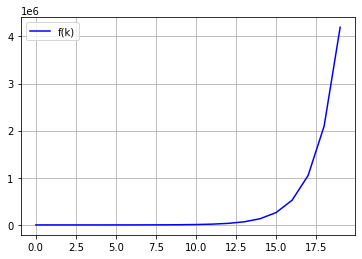

In [9]:
num =  [8, 0]
den =  [1, -3, 2]
npoint = 20

fk = longdiv(num, den, npoint);
print("Werte von f(k) von k=0 bis k=19:"+str(fk))
plt.plot(range(npoint),fk,'blue')
plt.grid()
plt.legend(['f(k)'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Das System ist instabil.

## <span style='color:Gray'>Beispiel #4 </span>

Werte von yc(k) von k=0 bis k=19:[1.    0.905 0.819 0.741 0.67  0.607 0.549 0.497 0.449 0.407 0.368 0.333
 0.301 0.273 0.247 0.223 0.202 0.183 0.165 0.15 ]


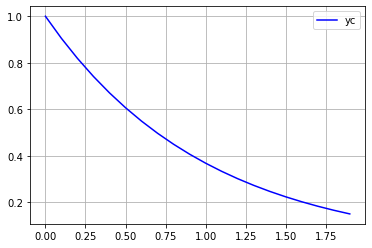

In [10]:
Ts = 0.1
p = -1
npoint = 20

N=[1, 0]
D=[1, -exp(Ts*p)]

yc = longdiv(N, D, npoint);
print("Werte von yc(k) von k=0 bis k="+str(npoint-1)+":"+str(np.around(yc,3)))
plt.plot(np.arange(0.0, npoint*Ts, Ts),yc,'blue')
plt.grid()
plt.legend(['yc'])
plt.show()

Werte von yh(k) von k=0 bis k=19:[0.    0.095 0.086 0.078 0.07  0.064 0.058 0.052 0.047 0.043 0.039 0.035
 0.032 0.029 0.026 0.023 0.021 0.019 0.017 0.016]


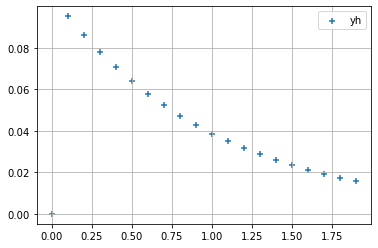

In [11]:
yh = longdiv(1-exp(Ts*p),[1, -exp(Ts*p)],npoint);
print("Werte von yh(k) von k=0 bis k="+str(npoint-1)+":"+str(np.around(yh,3)))
plt.scatter(np.arange(0.0, npoint*Ts, Ts),yh, marker = '+')
plt.grid()
plt.legend(['yh'])
plt.show()

## <span style='color:Gray'>Beispiel #5 </span>

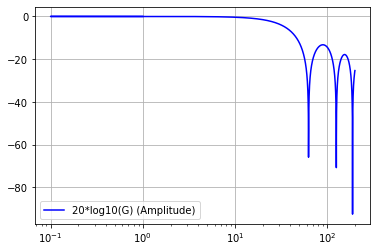

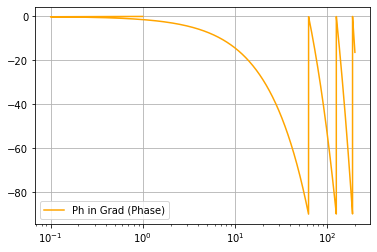

In [12]:
def BodeZOH(Ts,om,ommax,dom):
    k=0;
    kmax = round(ommax/dom);
    for k in range(1, kmax):
        om[k] = k*dom
        Renum = 1 -cos(-om[k]*Ts)
        Imnum = -sin(-om[k]*Ts)
        Gnum = sqrt(Renum*Renum+Imnum*Imnum)
        G[k] = Gnum/(om[k]*Ts)
        Ph[k] = atan2(Imnum,Renum)-pi/2
        
    return [G, Ph]

Ts = 0.1;
ommax = 200;
dom = 0.1;
om=np.arange(1.0, ommax+1, dom)
G=np.arange(1.0, ommax+1, dom)
Ph=np.arange(1.0, ommax+1, dom)
G, Ph = BodeZOH(Ts,om,ommax,dom)
Ph[0]=0.0

plt.plot(om,20*log10(G),'blue')
plt.xscale("log")
plt.grid()
plt.legend(['20*log10(G) (Amplitude)'])
plt.show()

plt.plot(om,Ph*90/pi,'orange')
plt.xscale("log")
plt.grid()
plt.legend(['Ph in Grad (Phase)'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Amplitude ist im z Bereich kleiner als 20dB.

## <span style='color:Gray'>Beispiel #6 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
    
- Wir stellen drei Verfahren vor, wie in Python die Transformation von kontinuierlichen Systemen zu diskreten Systemen erfolgen kann.
- Dabei wird die Python-Funktion <code>control.sample_system</code> verwendet, welche der Matlab-Funktion <code>c2d</code> ähnelt
- Gegeben sei das System:

  $G(s)=\frac{1}{s+1}$ und $T_s=0,1$

In [13]:
Ts = 0.1
s = control.TransferFunction.s
z = control.TransferFunction.z
print('Abtastzeit: '+str(Ts)+"\n")


G  = (1)/(s + 1)
print('Kontinuierliches System:\n')
print(G)
print("-----------------------------\n")

print('Beispiel 1: ZOH\n')
Gh = control.sample_system(G,Ts,method='zoh')
print(Gh)
print("-----------------------------\n")
    

print('Beispiel 2: Impulse\n')
Gz = control.sample_system(G,Ts,method='impulse')
print(Gz)
print("-----------------------------\n")

print('Bespiel 3: Verfahren G(s)/s')

print("\nGi:")
Gi = (1)/(s)
print(Gi)

print("Gs = G*Gi:")
Gs = G*Gi
print(Gs)

print("Gsz:")
Gsz = control.sample_system(Gs,Ts,method='impulse')
print(Gsz)

print("Gh:")
Gh = (z-1)/(z)
Gh.dt = Ts
print(Gh)

print("Gf=Gh*(Gsz/Ts):\n")
Gf = Gh*(Gsz/Ts)
print(Gf)

Gf.minreal()

Abtastzeit: 0.1

Kontinuierliches System:


  1
-----
s + 1

-----------------------------

Beispiel 1: ZOH


 0.09516
----------
z - 0.9048

dt = 0.1

-----------------------------

Beispiel 2: Impulse


  0.1 z
----------
z - 0.9048

dt = 0.1

-----------------------------

Bespiel 3: Verfahren G(s)/s

Gi:

1
-
s

Gs = G*Gi:

   1
-------
s^2 + s

Gsz:

0.009516 z + 2.22e-16
----------------------
z^2 - 1.905 z + 0.9048

dt = 0.1

Gh:

z - 1
-----
  z

dt = 0.1

Gf=Gh*(Gsz/Ts):


0.009516 z^2 - 0.009516 z - 2.22e-16
------------------------------------
  0.1 z^3 - 0.1905 z^2 + 0.09048 z

dt = 0.1



TransferFunction(array([0.09516258]), array([ 1.        , -0.90483742]), 0.1)

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Nun werden Transformationen eines Sinus-Signales simuliert:
</div>

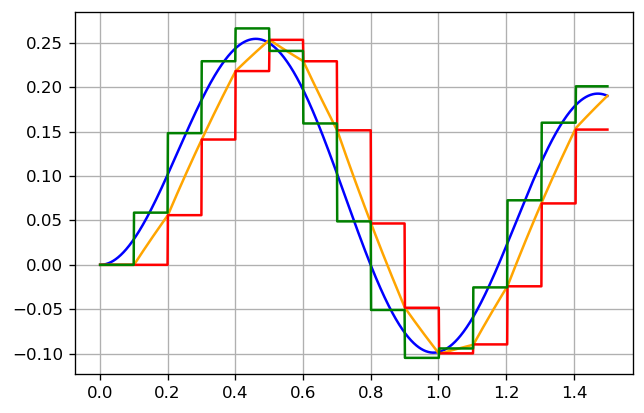

In [14]:
from IPython.display import HTML

import sys
sys.path.append('Pysim')

from Schema import Schema
from Block import TransferFunction, Sum, StepSource, SinusoidalSignalSource
from DTBlock import DTTransferFunction, ZOH

tini = 0 # Start time
tfinal = 1.5 # End time
dt = 0.001 # Time Step
nflows = 7 # Number of data flows in the schematic
Ts = 0.1 # Sampling time for discrete time

sc = Schema(tini,tfinal,dt,nflows) # Instance of the simulation schematic

c1 = SinusoidalSignalSource(1,0,1,2*pi,0) # SinusoidalSignalSource(out,startv,Am,om,phi)
c2 = TransferFunction(1,2,[1],[1,1]) # TransferFunction(inp,out,num,den)
c3 = ZOH(1,3,Ts) # ZOH(inp,out,ts)
#Example 1 - ZOH at the input:
c4 = TransferFunction(3,4,[1],[1,1]) # TransferFunction(inp,out,num,den)
#Example 2:
c5 = DTTransferFunction(1,5,[0.09516],[1, -exp(-0.1)],Ts) # DTTransferFunction(inp,out,num,den,Ts)
#Example 3:
c6 = DTTransferFunction(1,6,[0.1, 0],[1, -exp(-0.1)],Ts) # DTTransferFunction(inp,out,num,den,Ts)

sc.AddListComponents(np.array([c1,c2,c3,c4,c5,c6]))

#Run the schematic and plot:
out = sc.Run(np.array([1, 2, 3, 4, 5, 6]))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.set_dpi(120)
ax.plot(out[0,:],out[2,:],'blue',out[0,:],out[4,:],'orange',out[0,:],out[5,:],'red',out[0,:],out[6,:],'green')
ax.grid()
plt.show()
HTML('<img src="bilder/v02_regelstrecke.png"></img>')

## <span style='color:Gray'>Beispiel #7 </span>

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Gegeben ist : $G(z)=\frac{z}{z-e^{-\tau}}$, und $U(z)=\frac{z}{z-1}$ mit $\tau=0,1$

Und nehmen wir an:  $Y(z)=G(z)U(z)$


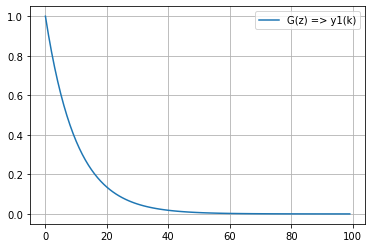

In [15]:
Ts = 0.1;
#G(z):
Gz=[[1, 0],[1, -exp(-Ts)]]
#%Impuls: longdiv(num,den,100)
y1=longdiv(Gz[0],Gz[1],100);
plt.plot(range(0,100),y1)
plt.grid()
plt.legend(['G(z) => y1(k)'])
plt.show()

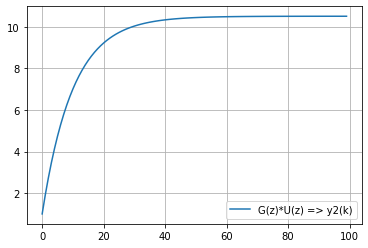

In [16]:
Uz = [[1, 0],[1, -1]]
Yz = [np.polymul(Uz[0],Gz[0]), np.polymul(Uz[1],Gz[1])]
#Y(z)=G(z)*U(z)
#print(Yz[0])
#print(Yz[1])

y2=longdiv(Yz[0],Yz[1],100);
plt.plot(range(0,100),y2)
plt.grid()
plt.legend(['G(z)*U(z) => y2(k)'])
plt.show()

<div style="font-family: 'times'; font-size: 13pt; text-align: justify">
Die Übertragungsfunktion lautet stattdessen:
<br><br>
$G(z)$=$\frac{z(z-e^{-\tau})-(z-1)}{(z-1)(z-e^{-\tau})}$

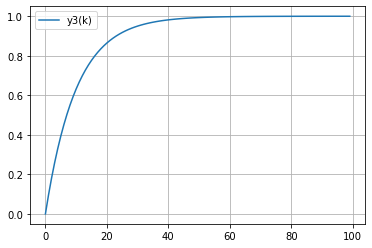

In [17]:
Gz2 = [[1-exp(-Ts),0],[1,-1-exp(-Ts),exp(-Ts)],Ts]
y3=longdiv(Gz2[0],Gz2[1],100);
plt.plot(range(0,100),y3)
plt.grid()
plt.legend(['y3(k)'])
plt.show()